# Gas Usage on ERC20 EVM Extension

This notebook plots the gas usage data generated for the ERC20 EVM extension.

In [21]:
import os
import re
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


This notebook makes use of the test data that is being written to CSV files, when executing the following command in a terminal:

```bash
ginkgo run ./precompiles/erc20
```

First, we are finding all CSV files in the current folder:

In [22]:
directory = os.getcwd()
csv_files = glob.glob(directory + '/*.csv')

Next, we are defining the necessary functions, to read, sort and plot the gas usage data using the `pandas` package.

In [23]:
def plot_gas_usage_values(file: str):
    # Extract the method name from the file name, which is erc20_METHODNAME.csv
    method_name = re.search(r'erc20_(.*).csv', file).group(1)
    if method_name is None:
        raise ValueError('Could not extract method name from file name: ' + file)

    # Read the csv file into a dataframe
    df = pd.read_csv(
        file, 
        header=None,
        names=['sent_amount', 'extension_call', 'erc20_call', 'erc20_v5_call'],
    )

    df = df.sort_values(by='sent_amount')
    df = df.reset_index(drop=True)

    # Replace zeros with NaNs
    df = df.replace(0, np.nan)

    # Plot the data
    ax = df.plot(x="sent_amount", title=method_name)

## Plots

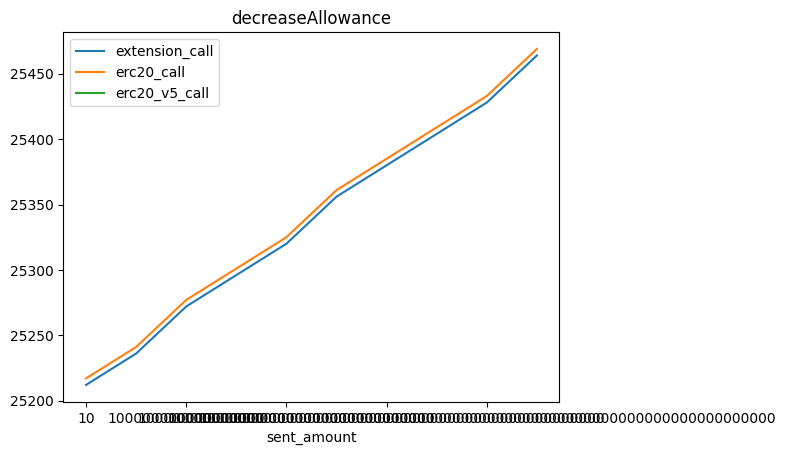

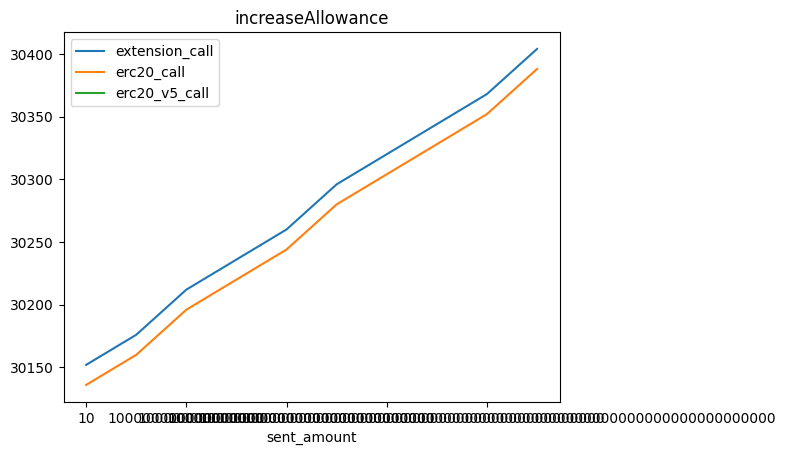

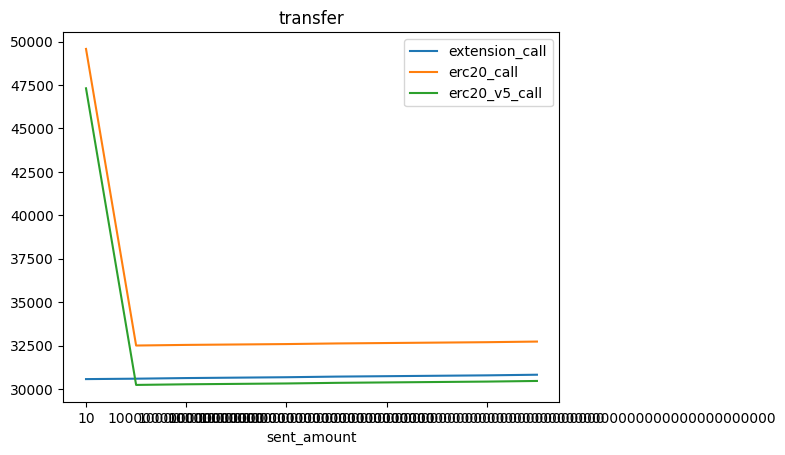

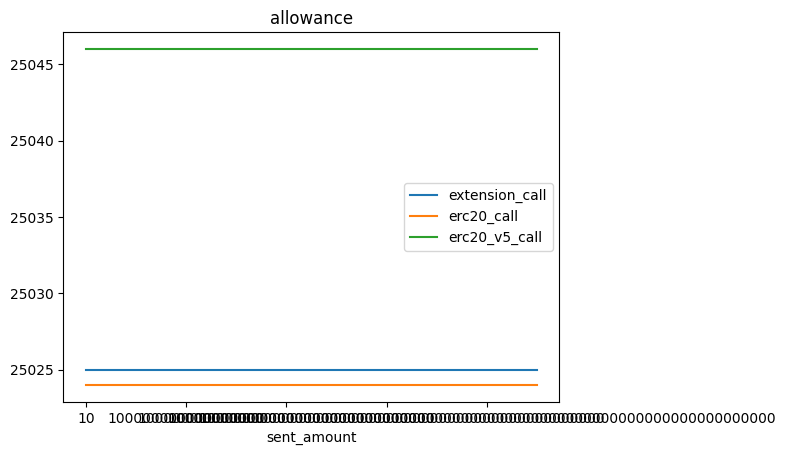

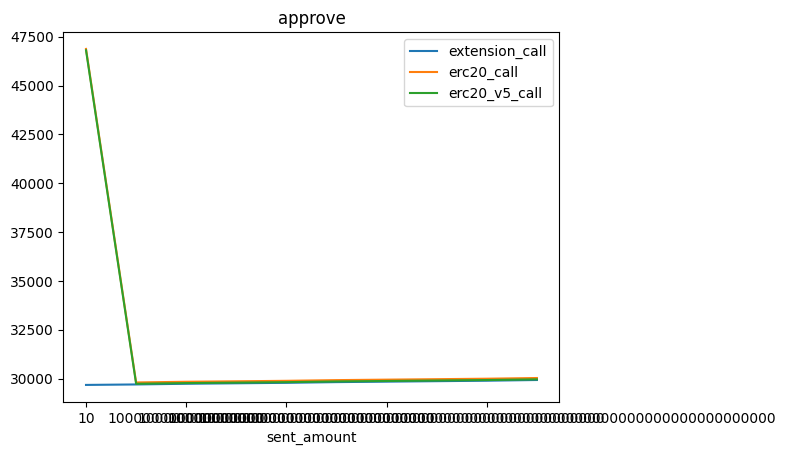

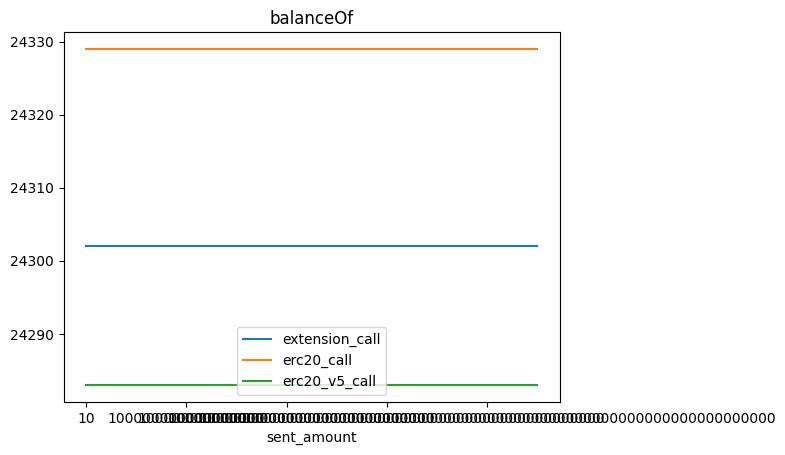

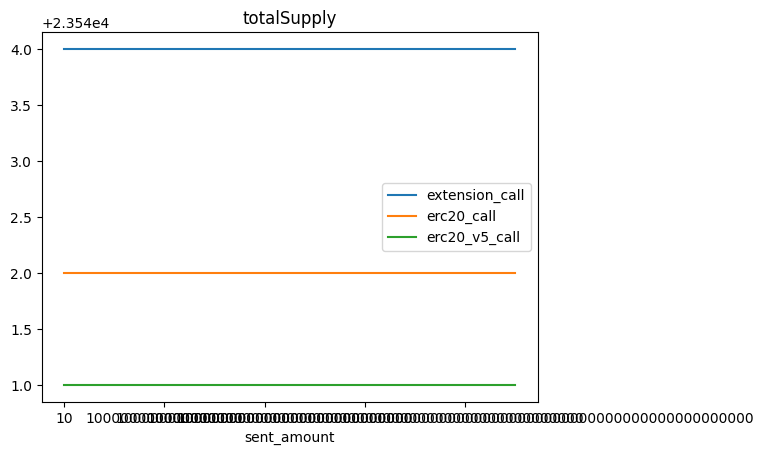

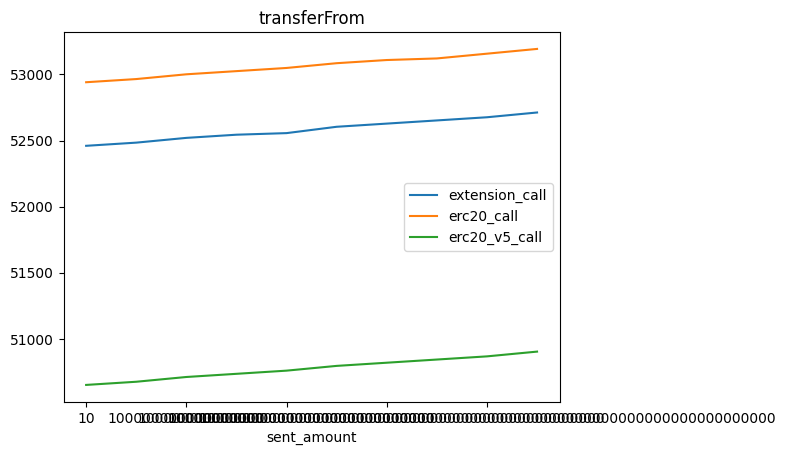

In [24]:
for file in csv_files:
    plot_gas_usage_values(file)